In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
columns = market_data_df.columns
market_data_scaled = StandardScaler().fit_transform(market_data_df[columns])

In [9]:
# Create a DataFrame with the scaled data
market_data_df_scaled = pd.DataFrame(market_data_scaled, columns=columns)

# Copy the crypto names from the original data
market_data_df_reset = market_data_df.reset_index()
market_data_df_scaled['coin_id'] = market_data_df_reset['coin_id']

# Set the coin_id column as index
market_data_df_scaled.set_index('coin_id', inplace=True)

# Display sample data
market_data_df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(market_data_scaled)
    inertia_values.append(kmeans.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_crypto_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_crypto_df

d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.220364
5,6,52.829819
6,7,43.786435
7,8,37.527740
8,9,33.070926
9,10,28.989073


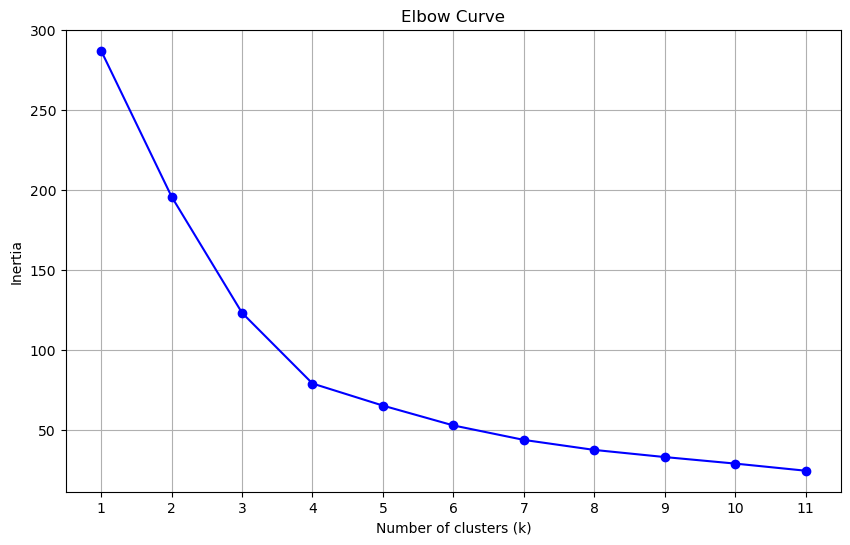

In [12]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_crypto_df['k'], elbow_crypto_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** In this case, the best value of k appears to be 4. The curve begins to noticeably decrecrese at a decreasing rate after this point.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [13]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(market_data_scaled)
clusters = kmeans.predict(market_data_scaled)
market_data_df_scaled['Cluster'] = clusters


d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_scaled)

d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(market_data_scaled)

# View the resulting array of cluster values.
clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [32]:
# Create a copy of the DataFrame
market_data_df_clustered = market_data_df_scaled.copy()

In [33]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_scaled['crypto_cluster'] = clusters

# Display sample data
market_data_df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster,crypto_cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2


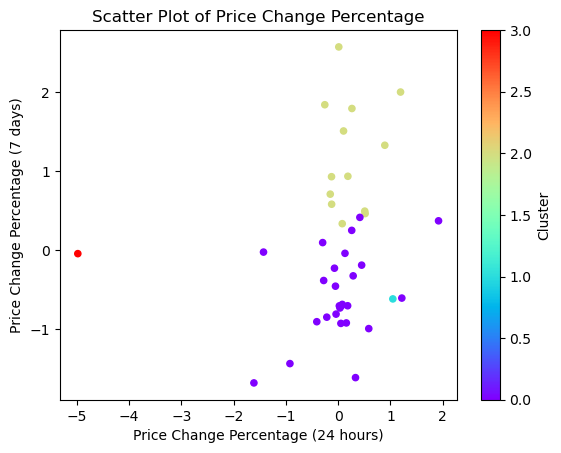

In [27]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_clustered.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c='Cluster', colormap='rainbow')

plt.xlabel('Price Change Percentage (24 hours)')
plt.ylabel('Price Change Percentage (7 days)')
plt.title('Scatter Plot of Price Change Percentage')

plt.show()

### Optimize Clusters with Principal Component Analysis.

In [28]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [29]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_result = pca.fit_transform(market_data_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [30]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

for i, ratio in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {ratio:.8f}")

Explained Variance for PC1: 0.37198560
Explained Variance for PC2: 0.34700813
Explained Variance for PC3: 0.17603793


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** In this case, the total explained varience is 0.89503166

In [35]:
# Create a new DataFrame with the PCA data.
pca_data_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'], index=market_data_df_scaled.index)

# Copy the crypto names from the original data
pca_data_df['coin_id'] = market_data_df_scaled.index
pca_data_df['crypto_cluster'] = market_data_df_scaled['crypto_cluster']

# Set the coinid column as index
pca_data_df.set_index('coin_id', inplace=True)

# Display sample data
pca_data_df.head()

,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


### Find the Best Value for k Using the PCA Data

In [37]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia_values.append(kmeans.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.091637
8,9,13.667065
9,10,10.559358


Text(0.5, 1.0, 'Elbow Curve')

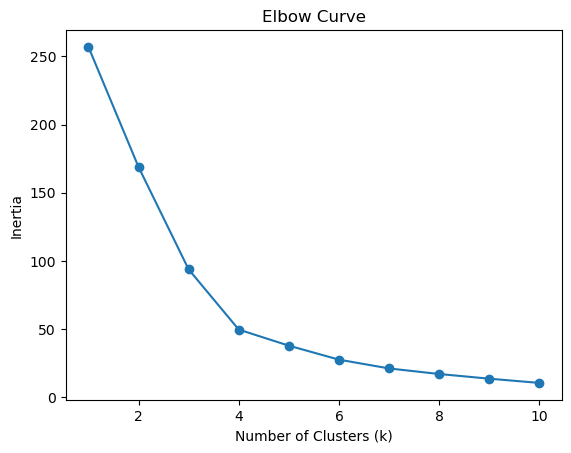

In [39]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 still seems to be the best value for k.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** While, the elbow curve is very similar, the trend for inertia to decrease at a decreasing rate seems more obvious in this case.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [40]:
# Initialize the K-Means model using the best value for k
kmeans_4 = KMeans(n_clusters=4, random_state=42)

In [41]:
# Fit the K-Means model using the PCA data
kmeans_4.fit(pca_result)


d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\envs\clonebase\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [42]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_4.predict(pca_result)

# Print the resulting array of cluster values.
clusters_pca

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0])

In [59]:
# Create a copy of the DataFrame with the PCA data
pca_data_clustered = pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_clustered['Predicted_Cluster'] = clusters_pca

# Display sample data
pca_data_clustered.head()

#backup for later
copy = market_data_df_scaled.copy()

In [60]:
import hvplot.pandas
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

scatter_plot = pca_data_clustered.hvplot.scatter(x='PC1', y='PC2', by='Predicted_Cluster')

# Show the plot
scatter_plot



:NdOverlay   [Predicted_Cluster]
   :Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [64]:
# Use the columns from the original scaled DataFrame as the index.
copy.drop(columns=['Cluster', 'crypto_cluster'], inplace=True)

feature_names = copy.columns
weights_df = pd.DataFrame(data=pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3'])
weights_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

For PC1, price_change_percentage_200d has the higheest postive influence, while price_change_percentage_24h has the greatest negative influence.

For PC2, price_change_percentage_30d has the highest positive influcce, while price_change_percentage_1y has the greatest(though weak), negative influence.

For PC3, price_change_percentage_7d has the highest positive influcce, while price_change_percentage_60d has the greatest, negative influence.
    